In [1]:
# Данный код монтирует гугл диск к директории /gdrive
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Отчет по финальному проекту "Прогнозирование оттока клиентов"

### Введение

Выстраивание взаимоотношений с клиентами или customer relationship managmenet (CRM) является важным звеном в функционировании любого бизнеса. От того, насколько хорошо простроена работа с аудиторией зачастую зависит успех всей компании. В проектерассматривается одна из наиболее актуальных задач из области CRM: прогнозирование оттока пользователей или churn prediction. Суть задачи заключается в заблаговременном нахождении сегмента пользователей, склонных через некоторый промежуток времени отказаться от использования некоторого продукта или услуги. Точное и своевременное нахождение таких пользователей позволяет эффективно бороться с их оттоком, например, выявлять причины оттока и принимать меры по удержанию клиентов. Эта задача актуальна для большинства организаций, оказывающих услуги в сегменте B2C и вдвойне актуальна в областях, где распространение услуги близко к отметке 100%. 

### 1 Цели и задачи проекта. 

Данные для соревнования были предоставлены французской телекоммуникационной компанией Orange. В задаче речь идет о клиентских данных, поэтому данные были предварительно обфусцированы и анонимизированны: из датасета убрана любая персональная информация, позволяющая идентифицировать пользователей, а также не представлены названия и описания переменных, предназначенных для построения прогнозов. Набор данных orange small dataset. Он состоит из 50 тыс. объектов и включает 230 переменных, из которых первые 190 переменных - числовые, и оставшиеся 40 переменные - категориальные.

Цель проекта - научиться находить пользователей, склонных к оттоку. Если научиться находить таких пользователей с достаточной точностью заблаговременно, то можно эффективно управлять оттоком: например, выявлять причины оттока; помогать пользователям, попавшим в группу риска, решать их проблемы и задачи; проводить кампании по удержанию.

В рамках проекта будет решена задача прогнозирования оттока пользователей, или churn prediction. Эта задача заключается в прогнозировании вероятности того, что клиент перестанет пользоваться сервисом в течение некоторого заданного заранее промежутка времени, например, решит перейти к конкуренту или откажется от использования услуги данного типа вообще. Задача прогнозирования оттока является одной из важнейших подзадач в области работы с аудиторий и актуальна не только для телекоммуникационных компаний, но и для большинства организаций, оказывающих услуги в сегменте B2C (прим. часто и в B2B тоже, однако в этом случае под клиентом мы понимаем компанию). Такие задачи часто возникают на практике у телекоммуникационных операторов, провайдеров кабельного телевидения, страховых компаний, банков, крупных и средних интернет-порталов и др.

### 2 Методика измерения качества и критерий успеха. 

Оптимизация и оценка качества модели будет проводится с помощью метрики ROC-AUC. ROC-кривая (англ. receiver operating characteristic) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

Также известна как кривая ошибок. Анализ классификаций с применением ROC-кривых называется ROC-анализом.

Количественную интерпретацию ROC даёт показатель AUC (англ. area under ROC curve, площадь под ROC-кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше.

Кроме того, при оценке качества модели важно понять такие основные характеристики к точность(Precision) и полнота(Recall). Также полезно будем посмотреть на такие показатели, как F-Score и Log Loss.

Процесс тестирования будет устроен следующим образом. В начале будет выделена часть данных под hold out выборку(контроль на отложенных данных), которая необходима для финального теста работоспособности наиболее оптимальной модели. Если модель не сможет показать на отложенных данных результаты, которые бы были сопоставимы с результатами на тестах, то это будет сигналом о возможной переоптимизации и переподгонки под тестовые данные. Процесс тестирования различных моделей с различными настройкими будет проходить с использованием кросс-валидации(на 3 фолда). Это позволит наиболее полно использовать оставшиеся данные для тестов. Планируется пробовать различные комбинации обработки данных с различными вариантами оптимизационных моделей: регрессионная модель, случайный лес и градиентный бустинг.

Критерием успешности для модели будет выступать метрика ROC-AUC. Именно та модель, которая покажет максимальный результат по метрике ROC-AUC будет признана наиболее оптимальной для использования при работе с данной клиентской базой. Также можно считать, что компания ожидает получить от нас модель, чьи результаты по метрике ROC-AUC были бы выше 0.6671 (baseline в соревновании на kaggle). Также можно будет говорить об успехе только в том случае, если модель успешно пройдет тестирование на отложенных данных.

### 3 Техническое описание решения. Опишите, как строится модель, какой pipline обработки данных? Здесь отлично будут смотреться схематические иллюстрации!



В начале, исходные данные делятся на обучающую выборку и отложенную выборку(hold out). Затем данные из обучающей выборки делятся по столбцам на те, которые содержат числовые переменные, и те, которые содержат категориальные переменные. Это делается потому, что методы работы с различными видами данных должны быть различными. В качестве вариантов оптимизационных моделей мы будем использовать следующие модели: регрессионная модель, случайный лес и градиентный бустинг. После определенных преобразований и операций с данными мы будем проверять, как на полученных данных смогли обучиться различные варианты моделей. Основной метрикой будет выступать ROC-AUC. Чтобы как можно полнее использовать обучающую выборку мы будем использовать кросс-валидацию на 3 фолда. В процессе поиска наилучшего решения были опробованы следующие методы преобразования данных и работы с ними:

* были построены кривые обучения для поиска оптимального размера выборки
* изменялось соотношение классов "отток" и "не отток" и узучалось как это влияет на качество моделей
* к выборке применялась технология undersampling
* применялись различныестратегии обработки пропусков в вещественных признаках
* были опробованы различные алгоритмы обработки категориальных признаков: заполнение пропусков самым частым значением, заполнение пропусков новым значением (NaV), преобразование признаков с помощью DictVectorizer, преобразование признаков с помощью OneHotEncoder, преобразование признаков с помощью LabelEncoder
* были проведены процедуры по отбору признаков различными методами: add-del, метод SelectKBest из библиотеки sklearn.feature_selection, метод SelectFdr из библиотеки sklearn.feature_selection

Все эти преобразования проверялись сразу на нескольких моделях и только после этого принималось решения стоит использовать такое преобразование или нет.

Кроме того, в самом конце для лучшего решения была проведена процедура подбора параметров модели с использованием RandomizedSearchCV.

В итоге наилучшее качество было получено с использованием модели на основе XGBClassifier. При предварительном отборе признаков были удалены все константные признаки и признаки не содержащие значений.К категориальным признакам применяется LabelEncoder. 

В соревновании на kaggle в качестве метрики взята ROC AUC. Моя модель набрала 0.70218 по метрике ROC AUC, успешно преодолев baseline равный 0.66710.

In [0]:
import pandas as pd
import random
import numpy as np
from scipy.sparse import coo_matrix, hstack
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import learning_curve
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import xgboost as xgb
import scipy.stats as ss
import itertools
import sys

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score, recall_score, precision_score, log_loss, make_scorer

from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [0]:
# функция для кодирования категориальных признаков
def labelEncoder(data):
    le = LabelEncoder()
    for m in range(data.shape[1]):
        #print(m)
        tmp = data.iloc[:,m].astype(str)
        le.fit(tmp)
        data.iloc[:,m] = le.transform(tmp)        
    return data

In [0]:
# удаление колонок со всеми пропущенными значениями
def dropUninformCol(data):
  df = pd.DataFrame()
  df = data.dropna(axis=1, how='all')
  return df

In [0]:
# так как DataFrame несбалансирован, то undersampling
def undersampling(x_train, y_train, alpha=0.5):
  over_1 = RandomUnderSampler(sampling_strategy=alpha)
  X, y = over_1.fit_resample(x_train, y_train)
  return X, y

In [0]:
def scale_frame(frame):
    """Функция масштабирает frame на отрезок [0;1]"""
    scaler = StandardScaler()
    scaled_matrix = scaler.fit_transform(frame.values)
    return pd.DataFrame(scaled_matrix, columns=frame.columns)

In [0]:
def predict_model_proba(X, model):
    """ Функция возвращает вероятности предсказаний для класса churn """
    return list(zip(*model.predict_proba(X)))[1]

In [8]:
#загрузим данные и проверим их
train = pd.read_csv('/gdrive/My Drive/DATA/Stepik/orange_small_churn_data.train')
labels = pd.read_csv('/gdrive/My Drive/DATA/Stepik/orange_small_churn_labels.train', header=None)

print(train.shape)
print(labels.shape)

(40000, 230)
(40000, 1)


In [0]:
# выделю категориальные признаки и выброшу пустые колонки
data_cat = dropUninformCol(train.iloc[:, 190:])

In [0]:
# преобразую категориальные признаки
data_cat_le = labelEncoder(data_cat)

In [0]:
# выделю числовые данные и удаляю полностью пустые колонки
data_num = dropUninformCol(train.iloc[:, :190])

In [0]:
# заменю null на медианные значения
data_num_mediana = data_num.fillna(data_num.median(axis=0))

In [0]:
# проведу маштабирование полученные числовых значений
data_num_scalled = scale_frame(data_num_mediana)

In [0]:
# проведу объединение числовых значений, категориальных признаков и labels
df = pd.concat([data_num_scalled, data_cat_le, labels], axis=1)
df = df.rename(columns={0:'labels'})

In [0]:
# провожу балансировку класса
def show_proportion_data(frame):
    proportion_plot = frame['labels'].plot(
        kind="hist",
        title="Labels proportion",
        figsize=(2,3),
        legend=False)
    proportion_plot.set_xlabel("Label value")
    proportion_plot.set_ylabel("Label frequency")
    not_churn_proportion = float(frame[frame["labels"] == -1].shape[0])/float(frame.shape[0])
    print(not_churn_proportion)
    churn_proportion = float(frame[frame["labels"] == 1].shape[0])/float(frame.shape[0])
    print ("Доля ответов класса \"отток\": %.4f%%\nДоля ответов класса \"не отток\": %.4f%%\nКласса \"отток\" меньше в %.4f раз" % (churn_proportion, not_churn_proportion, not_churn_proportion/churn_proportion))
    plt.show()

0.9256
Доля ответов класса "отток": 0.0744%
Доля ответов класса "не отток": 0.9256%
Класса "отток" меньше в 12.4409 раз


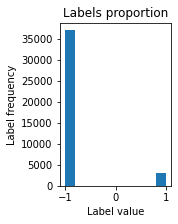

In [51]:
show_proportion_data(df)

In [52]:
# Применю к выборке технологию undersampling
over = RandomUnderSampler(sampling_strategy=0.95)
X_sampling, y_sampling = over.fit_resample(df.iloc[:, :212], df['labels'])
df_sampling = pd.DataFrame(X_sampling, columns=df.columns[:-1])
df_sampling['labels'] = y_sampling
print(Counter(y_sampling))

Counter({-1: 3132, 1: 2976})


0.5127701375245579
Доля ответов класса "отток": 0.4872%
Доля ответов класса "не отток": 0.5128%
Класса "отток" меньше в 1.0524 раз


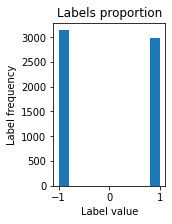

In [53]:
show_proportion_data(df_sampling)

In [0]:
# разобью выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(df_sampling.iloc[:, :-1], df_sampling['labels'], test_size=0.25)

In [78]:
# произведу поиск лучших параметров при помощи XGBoost
# попробуем xgboost
bst = xgb.XGBClassifier(n_estimators=100)
params = {'max_depth': [2, 3, 4],
          'learning_rate': [0.05, 0.1],
          'subsample': [0.8, 1.0]}

xgb_grid = GridSearchCV(bst, params, scoring = 'roc_auc', cv=3, n_jobs=-1, verbose=1)

xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   45.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3, 4],
                         'subsample': [0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True,

In [79]:
df_result = pd.DataFrame(xgb_grid.cv_results_)
df_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.859660,0.008006,0.017743,0.000733,0.05,2,0.8,"{'learning_rate': 0.05, 'max_depth': 2, 'subsa...",0.721009,0.717797,0.700720,0.713175,0.008904,7
1,1.647340,0.010870,0.017674,0.000636,0.05,2,1,"{'learning_rate': 0.05, 'max_depth': 2, 'subsa...",0.720973,0.718112,0.697320,0.712135,0.010541,10
2,2.613110,0.014333,0.018879,0.000200,0.05,3,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'subsa...",0.728395,0.723328,0.708022,0.719915,0.008660,1
3,2.273121,0.027763,0.018584,0.000152,0.05,3,1,"{'learning_rate': 0.05, 'max_depth': 3, 'subsa...",0.722479,0.714112,0.700805,0.712466,0.008925,9
4,3.393560,0.014646,0.020999,0.000744,0.05,4,0.8,"{'learning_rate': 0.05, 'max_depth': 4, 'subsa...",0.728689,0.722210,0.708130,0.719676,0.008582,2


In [80]:
# оптимальные параметры
xgb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8}

In [81]:
estimator = xgb.XGBClassifier(n_estimators=100, learning_rate = 0.05, max_depth = 3, subsample = 0.8)
estimator.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
xgb_predict = estimator.predict(X_test)

In [83]:
print ('ROC-AUC:', roc_auc_score(y_test, xgb_predict))
print ('PR-AUC:', average_precision_score(y_test, xgb_predict))
print('Precision: ', precision_score(y_test, xgb_predict))
print('Recall: ', recall_score(y_test, xgb_predict))

ROC-AUC: 0.6772889004897551
PR-AUC: 0.6376046073214907
Precision:  0.7083926031294452
Recall:  0.631979695431472


### 4 Качество модели

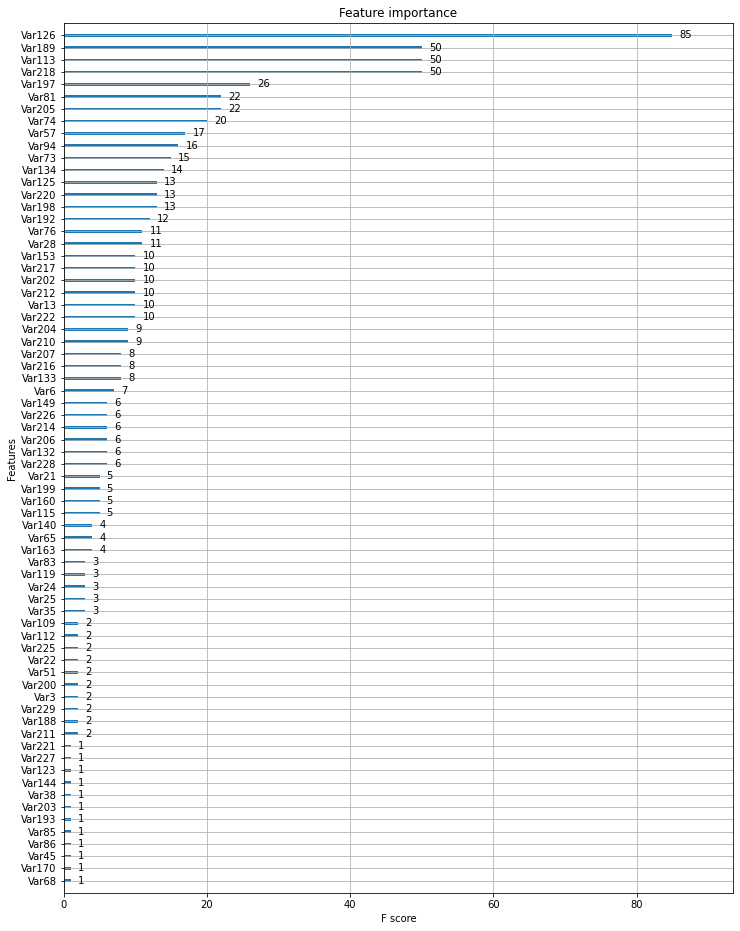

In [84]:
# следующим щагом выберу наиболее оличившиеся признаки

fig, ax = plt.subplots(figsize=(12, 16))
xgb.plot_importance(xgb_grid.best_estimator_, ax=ax)
plt.show()

**Согласно полученной офенке наибольший вклад внесли часловые признаки.**

#### Определяю экономический эффект

* 1500 рублей в среднем приносит один пользователь в месяц;
* 300 рублей в среднем мы будем вкладывать в удержание одного пользователя;
* с вероятностью 0.8 пользователь примет наше предложение;
* топ 1% согласно ранжированию по нашей модели будет участвовать в кампании;
* 1200000 клиентов пользуются услугами компании.


In [0]:
month_revenue_per_user = 1500 # Сколько денег в среднем приносит один пользователь в месяц (300 рублей)
price_per_user_churn = 300 # Сколько денег будем вкладывать в удержание пользователя (100 рублей)
retention_probability = 0.8 # Вероятность, с которой пользователь, собирающийся уйти, примет предложение
participants_perc = 0.01 # Сколько пользователей участвует. Участвует топ 1% согласно ранжированию по нашей модели
churn_size = 0.0744 # Процент пользователей, собирающихся уйти
clients_count = 1200000 # Количество клиентов

In [0]:
model = GradientBoostingClassifier().fit(X_train, y_train)

In [0]:
probabilities = predict_model_proba(X_test, model)

In [0]:
def calculate_revenue(probas, threshold, precision, count, rp):
    clients_count = len(probas)
    churn_count = np.round(clients_count * churn_size, 0) # Количество пользователей, которые собриаются уйти
    churn_found = np.round(churn_count*precision, 0) # Количество пользователей, собирающихся уйти, которых выявила модель
    #participants_count = len([p for p in probas if p > threshold]) # Количество пользователей в кампании
    participants_count = count
    not_participants_cnt = clients_count-participants_count # Количество пользователей не участвующих в кампании
    others_count = participants_count - churn_found # Количество пользователей не собирающихся уходить
    
    #retention_size = np.round(churn_found * retention_probability, 0) # Количество пользователей, которых удалось сохранить
    retention_size = rp
    churned = churn_count-retention_size # Количество пользователей, которые ушли
    saved_count = clients_count - churned # Количество пользователей после проведения кампании
    
       
    month_revenue = retention_size*month_revenue_per_user * retention_probability# Сколько денег получили в месяц
    money_spent = participants_count * price_per_user_churn # Сколько денег потратили на удержание в месяц
    
    
    return threshold, np.round(participants_count*100.0/clients_count, 2), month_revenue-money_spent, retention_size, participants_count

def build_revenue_table(shift = 0):
    data = []
    for threshold in np.arange(0.0, 1.0, 0.01):
        predictions = [-1 if probability < threshold else 1 for probability in probabilities]
        precision = precision_score(list(y_test), predictions) + shift
        r_pred = pd.DataFrame({'pred':predictions, 'test':list(y_test)})
        r_pred.head()
        rp = 0 # клиенты которые хотели но передумали
        count=0 #счетчик для клиентов которые могут уйти
        for index, row in r_pred.iterrows():
            if row['pred'] == 1 and row['test'] == 1:
                rp = rp + 1
            if row['pred'] == 1:
                count=count+1
    
        revenue_info = calculate_revenue(probabilities, threshold, precision, count, rp)
        data.append(revenue_info)
    return data

In [0]:
revenue_table = build_revenue_table()


Выведем таблицу, которая показывает, как от порогового значения вероятности зависит количество клиентов класса "отток" для которых эта вероятность выше. Таким образом становится понятно, какой топ клиентов необходимо брать для наибольшего экономического эффекта, который также рассчитан в таблице и по нему данная таблица отсортированна. Также приведено число клиентом(Count), которое были идентифицированны как склонные к оттоку, а также число клиентов (Saved clients count), которые действительно бы ушли, если бы не стали участниками акции по удержанию.


In [97]:
pd.DataFrame(
    sorted(revenue_table, key=lambda r: -r[2]),
    columns=["Threshold", "Clients %", "Effect", "Saved clients count", "Count"]).head(5)

,Threshold,Clients %,Effect,Saved clients count,Count
0,0.23,88.61,510900.0,764,1353
1,0.22,89.52,509100.0,766,1367
2,0.21,90.64,506400.0,768,1384
3,0.25,86.71,506400.0,753,1324
4,0.24,87.69,505500.0,756,1339


Для моей модели оптимальным оказалось взять 88.61% клиентов склонных к оттоку (по мнению модели) для получения максимальной прибыли. Это соответствует значению порога 0.23. То есть когда модель считает, что пользователь может уйти с вероятностью 23%, с ним можно начинать проводить кампанию по удержанию. Таких пользователей из 1200000 оказалось 1353 , и 764 из них готовы скоро уйти. Таким образом точность предсказания для этой группы пользователей составляет примерно 23%. Эффект от проведения компании составит 510900 рублей.

### 5. Об идеях и дополнениях по внедрению модели



Дополнительно можно сформулировать и предложить дизайн онлайн эксперимента, на основании которого можно будет оценить качество работы модели в продакшн. Может быть стоит провести А/Б-тестирование? Каким в этом случае будет дизайн эксперимента? Может быть вы захотите сформулировать предложения по процессу эксплуатации модели, мониторинга за качеством и дообучения модели? Проявите фантазию=)

Как писалось выше, использование прогнозной модели может оказаться экономически выгодным. Однако, на практике все оказывается по-другому, чем представлялось заранее. Поэтому хотелось бы поделиться некоторыми общими соображениями по поводу внедрения и использования модели (копипаст, но согласен с ним полностью):

Средний доход от одного абонента - это очень грубое усреднение. Необходимо разделять клиентов как минимум на важных(высокодоходных), обычных и низкодоходных. Именно для важных клиентов кампании по удержанию будут наиболее эффективны, потому что для них соотношение между месячной прибылью и стоимостью удержания будет максимальной. Для низкодоходных клиентов возможно вообще стоит отказаться от попыток по их удержанию.

"Средний" абонент. При построении прогнозной модели все пользователи усреднялись. Без сомнений, это весьма грубое допущение, потому как потребности у абонентов разные. Например, у кого-то может быть в приоритете стоимость сообщений, у кого-то интернет для планшета на дополнительном номере, а для кого-то важна бесперебойная связь в роуминге. Поэтому каждому надо делать предложение, которое может заинтересовать именно его, а не "среднего" абонента. Отсюда вывод о необходимости сегнментации абонентов (к счастью, не только для использования модели, а вообще для понимания поведения абонентов);

A/A тестирование. При наличии достаточного количества данных можно провести А/А тестирование бесплатно и узнать, например, как сильно могут отличаться доли в двух группах абонентов, которым мы не делаем никакого предложения. Если результаты существенно различаются, то, вероятно, мы плохо разбиваем пользователей на группы или упускаем что-то еще;

Разбиение пользователей для A/B тестирования. Здесь кажется логичным делать стратифицированные разбиения. Например, отобраны top% абонентов 1, 3, 5, ... абоненты попадут в группу A, а 2, 4, 6, ... абоненты попадут в группу B. Здесь мы полагаем эту выборку стратифицированной основываясь на результатах прогнозной модели (сначала идут те абоненты, предсказанная вероятность для которых больше). Однако, свои изменения могут внести сегментация, свежесть модели и прочее;

Профиль пользователя. Для каждого абонента можно анализировать историю звонков, ведь кто-то может пользоваться услугами преимущественно в рабочее время или наоборот. Так же, может оказаться полезным вычислять местоположение абонента, что тоже расскажет об абоненте и т.д. Профилирование и сегментация могут взаимно дополнять друг друга (и, вообще говоря, грань между ними может быть условной);

Наблюдение за ключевыми параметрами. Построить и использовать модель может оказаться полезным и выгодным делом, но, скорее всего, она не будет вечной. Поэтому периодически необходимо проверять как модель работает, как она описывает отток пользователей, постепенно набирая статистику как бизнес-показателей, так и метрик модели. Получая все больше и больше новых данных можно дообучать модель, выявлять ее слабые и сильные стороны;

Выявление ошибок классификации. Для объектов, где модель ошибается сильно можно найти наиболее близкие (например, использовать косинусную меру) и попытаться выявить, что приводит к ошибке. Однако, может оказаться, что эти объекты аномальные и нет разумных объяснений, почему допускается ошибка. В этом случае, можно разметить дополнительный признак;

Обновление модели. Рано или поздно настанет момент, когда модель перестанет давать заявленое качество. Это может быть вызвано разными измнениями: ситуация на рынке, новые предложения компании и т.д. Поэтому необязательно дожидаться падения метрик модели, если в работе компании произошли или планируются

Очень многое зависит от масштаба бизнеса, от количества клиентов к которым модель может быть применена. Затраты на улучшение модели - это некоторая фиксированная сумма. И для мелкого бизнеса такие вложения могут никогда не окупится, а для крупного бизнеса даже реальное улучшение на 1% может означать прибыль в миллионы рублей.

Прежде чем говорить о дополнительных вложениях в исследование по улучшении модели, надо сначала опробовать ту модель которая у нас уже есть в реальных условия. Будет очень хорошо, если она покажет именно те результаты, которые мы от неё ожидаем. Часто показатели эффективности модели в реальных условиях начинают сильно отличаться от заявленных в худшую сторону из-за переподгонки и переоптимизации. Кроме того, могут возникнуть новые факторы, которые не были учтены в модели, но очень сильно сказываются на её успользовании в реальных условиях. Невозможно улучшать до бесконечности, нужно опробывать ту модель которая есть. Если модель докажет свою эффективность, тогда конечно уже можно будет думать о выделении дополнительного финансирования на её улучшение.

